In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

# Load the dataset
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Show first few rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Map labels to binary (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Clean text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove whitespace
    return text

df['clean_msg'] = df['message'].apply(clean_text)


In [7]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_msg'])
y = df['label_num']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9713004484304932

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.85      0.95      0.90       149

    accuracy                           0.97      1115
   macro avg       0.92      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[942  24]
 [  8 141]]


In [15]:
def predict_spam(msg):
    msg_clean = clean_text(msg)
    msg_vec = vectorizer.transform([msg_clean])
    pred = model.predict(msg_vec)
    return "SPAM" if pred[0] == 1 else "NOT SPAM"

# Examples
print(predict_spam("Congratulations! You've won a free ticket. Call now!"))
print(predict_spam("Hi, are we still meeting tomorrow?"))


SPAM
NOT SPAM


C:\Users\Arham Lab\AppData\Local\Temp\ipykernel_7580\3024911893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


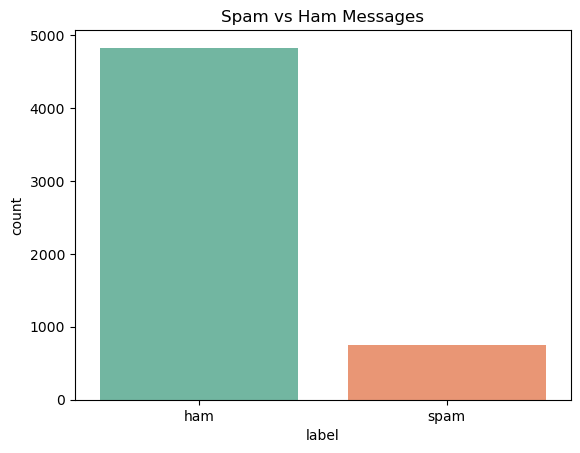

In [17]:
# Spam vs Ham count
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Spam vs Ham Messages')
plt.show()


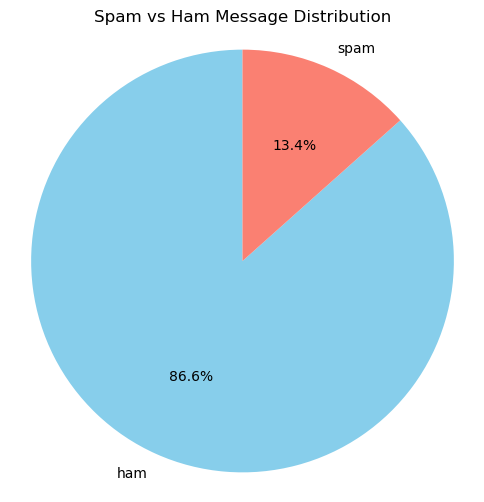

In [19]:
# Count labels
label_counts = df['label'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Spam vs Ham Message Distribution')
plt.axis('equal')
plt.show()